# Homework 2

**DUE NOV 11th at 11:59 PM**

You are expected to turn in a **pdf version** of this notebook with all your **codes, results, and figures** (Use the print option). Make sure the figures and results are visible as you want them to appear in the pdf before turning it in. Please do not modify the instructions as doing so will limit our ability to follow and grade your answers.

## Problem 1 (HW1 Problem 4)

In this problem, you will work on the clustering problem using Bottom-up Agglomerative clustering and K-mean clustering.

a) A 4-D dataset is given in **'iris.csv'** with the last column being the ground truth label. Load the file. Store the data in a variable ***X*** and store the label in a variable ***y***. Because clustering is an unsupervised task, there is no need for the labels during training.

In [1]:
import pandas as pd
import numpy as np 

df = pd.read_csv("iris.csv", header = None)
X = df.iloc[:,0:4]
y = df.iloc[:,-1]
X.head()
#print(y)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


b) Train a clustering model using Bottom-up Agglomerative clustering.

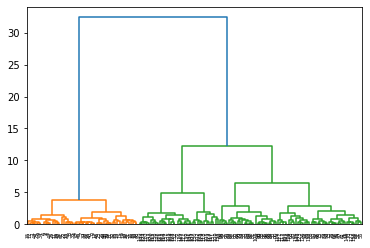

In [2]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

model = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
model.fit(X)
labels = model.labels_

Visualize your clusters on a 2-D plot. Choose any 2 dimensions from the 4 dimensions to plot. Try to pick the 2 dimensions that best separate the data. Your plot should contains all the data points with points from the same predicted cluster haveing the same color. 

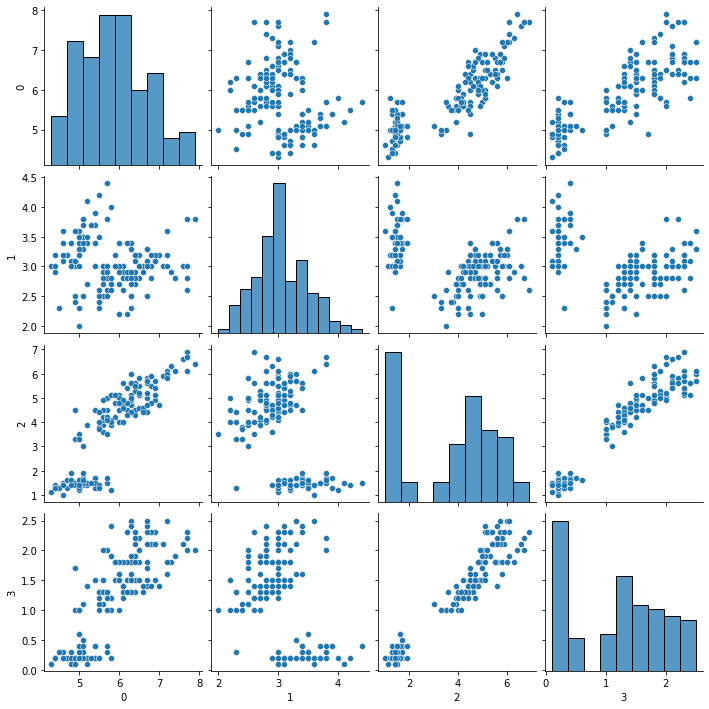

In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.pairplot(X)



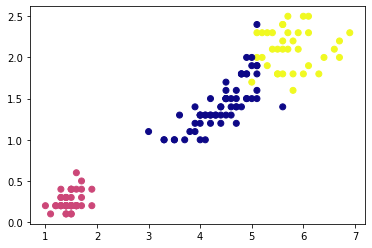

In [4]:

plt.scatter(X[2], X[3], c = model.labels_, cmap = 'plasma')

plt.show()


Repeat the visualization step above using the same 2 dimensions. This time, plot according to the ground truth classes. Comment on the performance of your model.

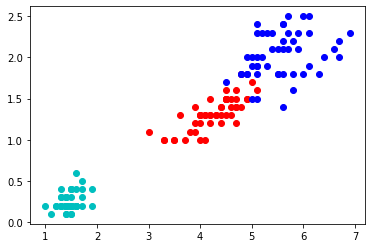

In [5]:

plt.scatter(X.iloc[0:50, [2]], X.iloc[0:50, [3]], color = 'c')
plt.scatter(X.iloc[50:100, [2]], X.iloc[50:100, [3]], color = 'red')
plt.scatter(X.iloc[100:150, [2]], X.iloc[100:150, [3]], color = 'blue')
plt.show()


The agglomerative clustering appeared to do fairly well. It misclassified one point way up in the right hand corner that seems wildly off, but the other points it misclassified were on the border between the two clusters.

c) Train a clustering model using K-mean clustering.

In [6]:
from sklearn.cluster import KMeans


model = KMeans(n_clusters = 3)
model.fit(X)
labels = model.labels_

Visualize your clusters on a 2-D plot. Choose any 2 dimensions from the 4 dimensions to plot. Try to pick the 2 dimensions that best separate the data. Your plot should contains all the data points with points from the same predicted cluster haveing the same color.

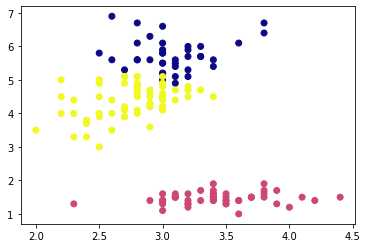

In [7]:
#plt.scatter(X[2], X[3], c = model.labels_, cmap = 'plasma')
plt.scatter(X[1], X[2], c = model.labels_, cmap = 'plasma')
#plt.scatter(X[1], X[3], c = model.labels_, cmap = 'plasma')
#plt.scatter(X[0], X[2], c = model.labels_, cmap = 'plasma')
plt.show()

Repeat the visualization step above using the same 2 dimensions. This time, plot according to the ground truth classes. Comment on the performance of your model.

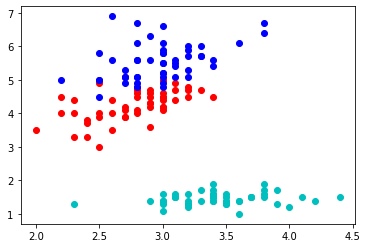

In [8]:
plt.scatter(X.iloc[0:50, [1]], X.iloc[0:50, [2]], color = 'c')
plt.scatter(X.iloc[50:100, [1]], X.iloc[50:100, [2]], color = 'red')
plt.scatter(X.iloc[100:150, [1]], X.iloc[100:150, [2]], color = 'blue')
plt.show()

My k-means model did fairly well. There are no points that were misclassified outside of the boundary between two clusters. It honestly seemed to pick better clusters, space-wise, than the actual labels do.

d) Perform Principle Component Analysis (PCA) on the data. Project the original data on the 2 largest principle components. Store this new projected 2-D data in a variable ***X_projected***.

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = StandardScaler().fit_transform(X)

pca = PCA(n_components = 2)
X_projected = pca.fit_transform(X)

Repeat part **b** on the new 2-D data. Train the Bottom-up Agglomerative model and visualize your results.

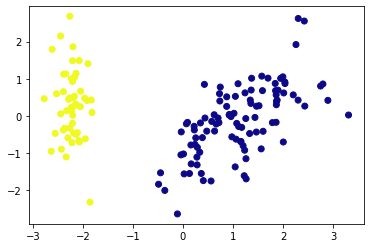

In [10]:
model = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
model.fit(X_projected)


plt.scatter(X_projected[:,0], X_projected[:,1], c = model.labels_, cmap = 'plasma')
plt.show()

Repeat part **c** on the new 2-D data. Train the K-means model and visualize your result.

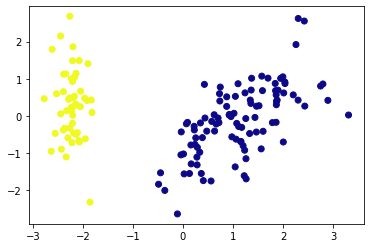

In [11]:
model = KMeans(n_clusters = 2)
model.fit(X_projected)

plt.scatter(X_projected[:,0], X_projected[:,1], c = model.labels_, cmap = 'plasma')
plt.show()

Compare the quality of 4-D and 2-D clusterings. When would the ideas of projection and dimensionality reduction be useful?

The 2-D clustering seems to give a much wider margin between the clusters. The difference between the groups is much clearer and more distinct. Projection is often helpful to allow us to use models like SVM that requiree a linear division of data, when the original data isn't necessarily easy to separate. Dimensionality reduction can be useful when data gets too complicated with the increase in dimensions. This can often lead to overfitting and models that don't generalize well on data outside of the test set. Some models are unable to compute data beyond a certain number of dimensions. Another reason we might want to use dimensionality reduction is if we want to visualize data, since we cannot go beyond 3 dimensions to do so.

## Problem 2

In this problem, you will first implement the Naive Bayes (NB) algorithm from scratch. We will use a dataset for classifying if a patient has breast cancer. Each instance (row) in the dataset is a patient described by the 9 following features (with their corresponding values).

1. Clump Thickness: 1 - 10
2. Uniformity of Cell Size: 1 - 10
3. Uniformity of Cell Shape: 1 - 10
4. Marginal Adhesion: 1 - 10
5. Single Epithelial Cell Size: 1 - 10
6. Bare Nuclei: 1 - 10
7. Bland Chromatin: 1 - 10
8. Normal Nucleoli: 1 - 10
9. Mitoses: 1 - 10

Given these features, we will classify a car into one of the 2 classes: 0 (benign) or 1 (malignant).

NB is a very simple algorithm. Consider a feature X. For each value $x_i$ of X and each class label $y_j$, NB calculates the value of $P(X = x_i | Y = y_j)$. For example, take the feature Mitoses, NB will calculate all the following values:

- P(Mitoses = 1 | Class = 0), P(Mitoses = 2 | Class = 0), P(Mitoses = 3 | Class = 0), ... , P(Mitoses = 10 | Class = 0)
- P(Mitoses = 1 | Class = 1), P(Mitoses = 2 | Class = 1), P(Mitoses = 3 | Class = 1), ... , P(Mitoses = 10 | Class = 1)

Repeat this calculation for all the features. In the end, NB keep a recording of all possible $P(X | Y)$. The calculation itself is intuitive:

$$
 P(X = x_i | Y = y_j) = \frac{\text{Number of rows with } X = x_i \text{ and } Y = y_j}{\text{Number of rows with } Y = y_j}
$$

In addition, NB also calculate the priors probability $P(Y = y_j)$. Again, intuitively:

$$
 P(Y = y_i) = \frac{\text{Number of rows with } Y = y_j}{\text{Number of rows in the dataset}}
$$

Given a test example $X_{test} = \{ X_0 = x_0, X_1 = x_1, \ldots, X_i = x_i\}$, for each class label $y_j$, NB calculate:

$$
\begin{align}
 P(Y = y_j | X_{test}) & = P(X_{test} | Y = y_j)P(Y = y_j) \\
                       & = P(X_0 = x_0 | Y = y_j)P(X_1 = x_1 | Y = y_j) \ldots P(X_i = x_i | Y = y_j)P(Y = y_j)
\end{align}
$$

Such calculation is easy since we have bookkept all $P(X | Y)$ and all $P(Y)$ in previous steps. The output of the model is simply:

$$
 \underset{y_j}{\operatorname{argmax}} P(Y = y_j | X_{test})
$$

You will do each of these steps following this problem. We will use Pandas to deal with the data in this problem. Pandas can do queries like "Get all the rows in which Clump Thickness = 2 and Class = 1" with minimal syntax.


a) First let's load the dataset from **"breast-cancer-wisconsin.csv"** and store it in a Pandas dataframe. Try inspecting the dataframe and get used to the queries (this part is not graded). This guide is a good place to start:

https://medium.com/python-in-plain-english/filtering-rows-and-columns-in-pandas-python-techniques-you-must-know-6cdfc32c614c 

Split the dataset into a training set and a testing set. Use 10% of the data as the testing set (The splitting is graded).

In [12]:
import pandas as pd
df = pd.read_csv('breast-cancer-wisconsin.csv', sep=r'\s*,\s*')
from sklearn.model_selection import train_test_split

X = df.iloc[:,0:-1]
y = df.iloc[:,-1]
#X.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
#train, test = train_test_split(df, test_size = 0.1)


/Users/user/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


b) Now we will build up the bookkeeping. Let's start with the priors $P(Y = y_j)$, $y_j \in$ {0,1}. For each of these labels, calculate $P(Y = y_j)$ by simply counting the number of times $y_j$ appears in the dataset divided by the size of the dataset. You can bookkeep the priors in a dictionary with keys being $y_j$.

In [13]:
priors = { '0': len(df[df['Labels'] == 0])/len(df['Labels']), '1': len(df[df['Labels'] == 1])/len(df['Labels'])}
priors

{'0': 0.6552217453505007, '1': 0.3447782546494993}

Now let's calculate the conditional probability $P(X = x_i | Y = y_j)$. If you do the query with Pandas, this counting should be simple. This time, store the conditional probability in another dictionary with keys ($x_i$, $y_j$) or any data structure that you prefer. 

In [14]:
def cross_tab(data_frame, id_col):
    col_names = ['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Labels']
    datasets = {}
    for i in col_names:
        datasets['crosstab_{}'.format(i)] = pd.crosstab(data_frame[id_col], data_frame[i], normalize = 'columns')
    return datasets

In [15]:
storage = cross_tab(df, "Labels")
storage.keys()
['crosstab_clump_thickness', 'crosstab_cell_size', 'crosstab_cell_shape', 'crosstab_adhesion', 'crosstab_epithelial', 'crosstab_nuclei', 'crosstab_chromatin', 'crosstab_nucleoli', 'crosstab_mitoses']
storage
#storage['crosstab_mitoses']

{'crosstab_Clump Thickness': Clump Thickness       1     2         3     4         5         6         7   \
 Labels                                                                         
 0                0.97931  0.92  0.888889  0.85  0.653846  0.470588  0.043478   
 1                0.02069  0.08  0.111111  0.15  0.346154  0.529412  0.956522   
 
 Clump Thickness        8    9    10  
 Labels                               
 0                0.086957  0.0  0.0  
 1                0.913043  1.0  1.0  ,
 'crosstab_Uniformity of Cell Size': Uniformity of Cell Size        1         2         3      4    5         6   \
 Labels                                                                        
 0                        0.989583  0.822222  0.519231  0.225  0.0  0.074074   
 1                        0.010417  0.177778  0.480769  0.775  1.0  0.925926   
 
 Uniformity of Cell Size        7         8         9    10  
 Labels                                                      
 0     

That's it! You have successfully "trained" a NB model. Let's test our model on the test dataset.

In [16]:
class NaiveBayesClassifier(object):
    
    def __init__(self):
        pass
    
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
        self.no_of_classes = np.max(self.y_train) + 1
     
        
    
    def euclidianDistance(self, Xtest, Xtrain):
        return np.sqrt(np.sum(np.power((Xtest - Xtrain), 2)))
    
       
    
    def predict(self, X, radius=0.4):   
        pred = []
        
        members_of_class = []
        for i in range(self.no_of_classes):
            counter = 0
            for j in range(len(self.y_train)):
                if self.y_train[j] == i:
                    counter += 1
            members_of_class.append(counter)
        
        for t in range(len(X)):
            prob_of_classes = []
            for i in range(self.no_of_classes):
                
                prior_prob = members_of_class[i]/len(self.y_train)

                
                inRadius_no = 0
                inRadius_no_current_class = 0
                
                for j in range(len(self.X_train)):
                    if self.euclidianDistance(X[t], self.X_train[j]) < radius:
                        inRadius_no += 1
                        if self.y_train[j] == i:
                            inRadius_no_current_class += 1
                
                margin_prob = inRadius_no/len(self.X_train)
                
                likelihood = inRadius_no_current_class/len(self.X_train)
                
                post_prob = (likelihood * prior_prob)/margin_prob
                prob_of_classes.append(post_prob)
            
            pred.append(np.argmax(prob_of_classes))
                
        return pred

In [17]:

def accuracy(y_tes, y_pred):
    correct = 0
    for i in range(len(y_pred)):
        if(y_test[i] == y_pred[i]):
            correct += 1
    return (correct/len(y_test))*100

In [18]:
def breastCancerTest():
    
    NB = NaiveBayesClassifier()
    NB.fit(X_train, y_train)
    
    y_pred = NB.predict(X_test, radius=8)
    
    
     
    
    print("Accuracy for my Naive Bayes Classifier: ", accuracy(y_test, y_pred), "%")
   

Predict the label of all the instances in the test dataset, calculate and print out the accuracy.

In [19]:
breastCancerTest()

KeyError: 1

## Problem 3

In this problem, you will implement the Logistic Regression (LR) algorithm from scratch. Similar to NB, LR relies on $P(Y|X)$ to predict the class of an example. However, unlike NB, a generative model, LR is a discriminative model so it does not need to estimate $P(X|Y)$ and $P(Y)$. LR assumes the form of the conditional probability $P(Y|X)$ to be:

$$
    P(Y | X) = f(X) = \frac{1}{1 + e^{-(\alpha X + \beta)}}
$$

$f(X)$ returns a value in (0,1). The model classifies $X$ as $1$ if $f(X)$ is closer to $1$ and $0$ otherwise. We have to estimate the model parameters: the vector $\alpha$ and $\beta$ from the data, which we will do via stochastic gradient descent (SGD). In SGD, a training example is shown to the model each at a time. The model makes a prediction on the training example and the error between the prediction and the ground-truth label is used to update the model's parameters. We use the log-likelihood function to estimate the error in this problem. In particular, the log-likelihood for classifying the $X^{(i)}$ example with the ground-truth $y^{(i)}$ is: 

$$
    LL(y^{(i)},f(X^{(i)})) = y^{(i)} \log(f(X^{(i)})) + (1 - y^{(i)}) \log(1 - f(X^{(i)}))
$$

In our case, the updating is as the followings:

$$
\alpha_{j}(t+1) = \alpha_{j}(t) - \frac{\partial LL}{\partial \alpha_j} \times rate
$$

$$
\beta(t+1) = \beta(t) - \frac{\partial LL}{\partial \beta} \times rate
$$

where $rate$ is the how much change we want to make to the parameters in each update. Whenever we finish looping through all the instances in the dataset to update the parameters, we finish a training epoch. We may do many training epochs (looping through the dataset many times), until the model parameters converge.

First, we need to derive the formula for $\frac{\partial LL}{\partial \alpha_j}$ and $\frac{\partial LL}{\partial \beta}$. To keep the problem simple, these are provided to you:

$$
    \frac{\partial LL}{\partial \alpha_j} = (y^{(i)} - f(X^{(i)}))X^{(i)}_{j}
$$

$$
    \frac{\partial LL}{\partial \beta} = (y^{(i)} - f(X^{(i)}))
$$

a) We use the same dataset for predicting breast cancer in Problem 2 for this problem. Load the dataset and split it into a training set and a testing set.

/Users/user/.pyenv/versions/3.7.3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Labels', ylabel='count'>

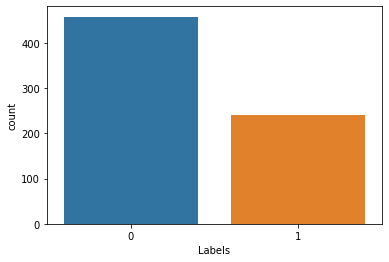

In [21]:
import seaborn as sns

plt.figure()
sns.countplot(df['Labels'])


In [23]:
df = pd.read_csv('breast-cancer-wisconsin.csv')
X = df.iloc[:,:-1].values.astype(np.float32)
y = df.iloc[:,-1]
y.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)


b) Learn the model parameters using SGD. A skeleton for SGD is provided to help you understand the process (You don't have to use the provided code). 

In [24]:
from math import exp

def g(z):
    return 1/(1+np.exp(-z))

def h(X, theta):
    return g(X @ theta)

def J(pred, y):
    return 1/m * (-y @ np.log(pred) - (1 - y) @ np.log(1 - pred))

def gradient(theta, X, y):
    pred = h(X, theta)
    grad = 1/m * X.T @ (pred - y)
    return grad



In [25]:

m, n = X_train.shape
theta = np.zeros(n)

In [26]:
acc = {'loss': []}

rate = 0.1
epochs = 50

for i in range(epochs):
    #size = sizes(X_train)
    #theta = thetas(X_train)
    grad = gradient(theta, X_train, y_train)
    theta -= rate * grad

    preds = h(X_train, theta)
    loss = J(preds, y_train)
    acc['loss'].append(loss)


    

if i % 10 == 0: print(loss)

  

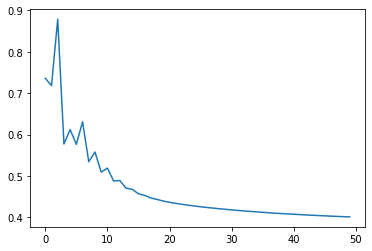

In [28]:
plt.plot(acc['loss'])

c) Load the testing dataset. Use $f(X)$ to predict the labels of the test instances. Calculate the accuracy.

In [ ]:
m, n = X_test.shape
theta = np.zeros(n)

accuracy = {'loss': [], 'accuracy': []}

rate = 0.1
epochs = 100

for i in range(epochs):
    #size = sizes(X_train)
    #theta = thetas(X_train)
    grad = gradient(theta, X_test, y_test)
    theta -= rate * grad

    preds = h(X_test, theta)
    loss = J(preds, y_test)
    accuracy['loss'].append(loss)

    if i % 10 == 0: print(loss)


Text(0.5, 0, 'Loss')

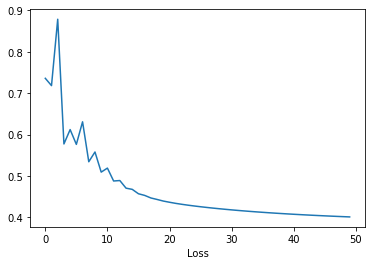

In [29]:
plt.plot(acc['loss'])
plt.xlabel("Loss")

In [30]:
preds = h(X_test, theta) > 0.5
print('Accuracy:',(preds == y_test).sum() / len(y_test))

Accuracy: 0.8285714285714286


## Problem 4

In this problem, you will investigate how the size of the training data on the performance of a generative model (NB) and a discriminative model (LR). **You are free to use scikit-learn's NB and LR.** 

a) Load the breast cancer training dataset and split it into a training set and a testing set. 

In [31]:
df = pd.read_csv('breast-cancer-wisconsin.csv')
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
y.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)


b) We will train NB classifiers that use only a portion of the training data. Let's vary this portion from 1% to 100% of the training set. For each portion value, sample the training set according to the portion, train a NB classifer on this portion of the training set, and evaluate the model accuracy on the testing set.  

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

accuracy = []
#for i in np.linspace(0.1, 1.0, num = 99, endpoint = False):
for i in np.arange(0.1, 1.0, 0.01):
    X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_train, y_train, test_size = i)
    model = MultinomialNB()
    model.fit(X_new_train, y_new_train)
    pred = model.predict(X_test)
    acc = metrics.accuracy_score(y_test, pred)
    accuracy.append(acc)


Plot the accuracies of the models versus the portion of the training set used. Comment on the effect of increasing the size of the training dataset on the performance of NB.

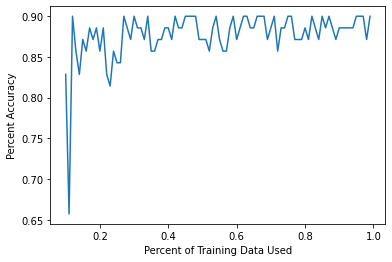

In [34]:
percent = np.arange(0.1, 1.0, 0.01)
percent = percent[::-1]
plt.plot(percent, accuracy)
plt.ylabel('Percent Accuracy')
plt.xlabel('Percent of Training Data Used')
plt.show()


Increasing thee training data seemed to improve the model's accuracy until it reached around 40%. At this point, the accuracy percentage stayed fairly constant. 

c) Repeat part **b** with LR.

In [35]:
from sklearn.linear_model import LogisticRegression

accuracy = []
#for i in np.linspace(0.1, 1.0, num = 99, endpoint = False):
for i in np.arange(0.1, 1.0, 0.01):
    X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_train, y_train, test_size = i)
    model = LogisticRegression()
    model.fit(X_new_train, y_new_train)
    pred = model.predict(X_test)
    acc = metrics.accuracy_score(y_test, pred)
    accuracy.append(acc)



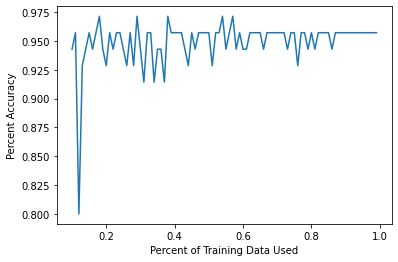

In [36]:
percent = np.arange(0.1, 1.0, 0.01)
percent = percent[::-1]
plt.plot(percent, accuracy)
plt.ylabel('Percent Accuracy')
plt.xlabel('Percent of Training Data Used')
plt.show()


The accuracy seems to increase with the amount of training data used. The highest accuracy occurs at roughly 70%.

Between a generative model (NB) and a discriminative model (LR), which is more affected by small training dataset? Think about a reason for this.

Generative models are less affected by small training datasets. This is because they are less likely to overfit, since they predict the distribution of the data which is based off of joint probability. Discriminative models, like logistic regression, might pick up on patterns in small datasets that aren't really there. 

## Problem 5

What is the hyperparameters, the parameters, and the objective function for finding the best hypothesis for each of the following methods:

1. Decision Tree (Entropy gain)
2. Support Vector Machine
3. K-nearest Neighbors Clustering

1. Hyperparameters for decision trees include criterion (impurity gain), the strategy used to split at nodes, the max depth of the tree, the number of samples needed to split a node, the number of smaples needed for a leaf node, the number of features used to find the best split, and whether or not the function presorts the data. A parameter of decision trees would be the split points themselves. The objective function for a decision tree is the gain function.
2. The hyperparameters of SVM include kernals, gamma values, and the maximum number of iterations. The parameters of SVM are the support vectors themselves. The objective function for a support vector machine is the Euclidean distance from the support vector and the nearest data point.
3. The hyperparamter for KNN is k, the number of clusters used. The parameters of KNN are the nearest neighbors. There is no objective function for KNN, as there is no function to optimize. 